In [1]:
import pandas as pd
# read csv file
total = pd.read_csv("hotel_bookings.csv")

In [2]:
# brief view of how many columns I have on this dataset
total.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
# Change default setting to None to display more rows
pd.set_option('display.max_rows', None)

In [4]:
# Breif view
total.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# count for total amount of data I have in my data set -> before doing any data cleaning
total.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [6]:
# Drop the data that has no adult
first_clean = total[(total['adults'] >= 1)]

In [7]:
first_clean.count()

hotel                             118987
is_canceled                       118987
lead_time                         118987
arrival_date_year                 118987
arrival_date_month                118987
arrival_date_week_number          118987
arrival_date_day_of_month         118987
stays_in_weekend_nights           118987
stays_in_week_nights              118987
adults                            118987
children                          118983
babies                            118987
meal                              118987
country                           118509
market_segment                    118987
distribution_channel              118987
is_repeated_guest                 118987
previous_cancellations            118987
previous_bookings_not_canceled    118987
reserved_room_type                118987
assigned_room_type                118987
booking_changes                   118987
deposit_type                      118987
agent                             102724
company         

In [8]:
# Drop the data that the reservation is canceled
second_clean = first_clean[first_clean.reservation_status != 'Canceled']
second_clean.count()

hotel                             76075
is_canceled                       76075
lead_time                         76075
arrival_date_year                 76075
arrival_date_month                76075
arrival_date_week_number          76075
arrival_date_day_of_month         76075
stays_in_weekend_nights           76075
stays_in_week_nights              76075
adults                            76075
children                          76075
babies                            76075
meal                              76075
country                           75650
market_segment                    76075
distribution_channel              76075
is_repeated_guest                 76075
previous_cancellations            76075
previous_bookings_not_canceled    76075
reserved_room_type                76075
assigned_room_type                76075
booking_changes                   76075
deposit_type                      76075
agent                             63619
company                            5684


In [9]:
# Eliminte the error I have on my dataset, if the reservation is canceled, then its status should be 1
third_clean = second_clean[second_clean.is_canceled != 1]
third_clean.count()

hotel                             74872
is_canceled                       74872
lead_time                         74872
arrival_date_year                 74872
arrival_date_month                74872
arrival_date_week_number          74872
arrival_date_day_of_month         74872
stays_in_weekend_nights           74872
stays_in_week_nights              74872
adults                            74872
children                          74872
babies                            74872
meal                              74872
country                           74451
market_segment                    74872
distribution_channel              74872
is_repeated_guest                 74872
previous_cancellations            74872
previous_bookings_not_canceled    74872
reserved_room_type                74872
assigned_room_type                74872
booking_changes                   74872
deposit_type                      74872
agent                             62620
company                            5586


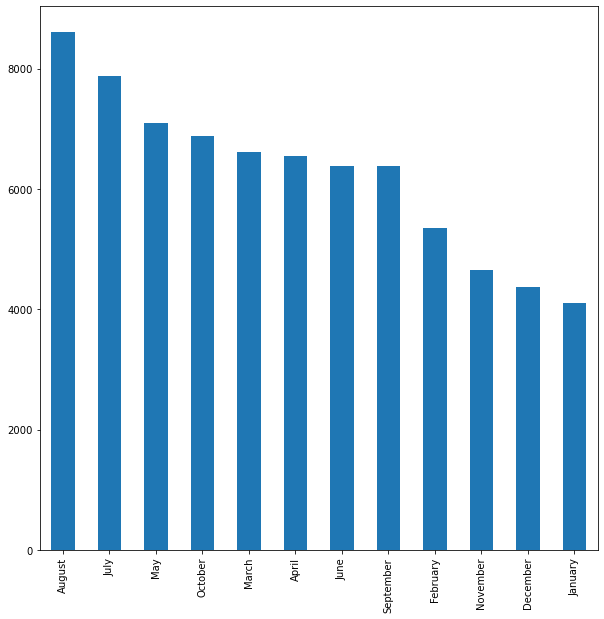

In [10]:
new_df = third_clean
new_df['arrival_date_month'].value_counts()[:20].sort_values(ascending = False).plot(kind='bar', figsize=(10,10))

In [16]:
first_clean_on_new_df = new_df.drop(['company', 'agent'], axis = 1)
first_clean_on_new_df.count()

hotel                             74872
is_canceled                       74872
lead_time                         74872
arrival_date_year                 74872
arrival_date_month                74872
arrival_date_week_number          74872
arrival_date_day_of_month         74872
stays_in_weekend_nights           74872
stays_in_week_nights              74872
adults                            74872
children                          74872
babies                            74872
meal                              74872
country                           74451
market_segment                    74872
distribution_channel              74872
is_repeated_guest                 74872
previous_cancellations            74872
previous_bookings_not_canceled    74872
reserved_room_type                74872
assigned_room_type                74872
booking_changes                   74872
deposit_type                      74872
days_in_waiting_list              74872
customer_type                     74872


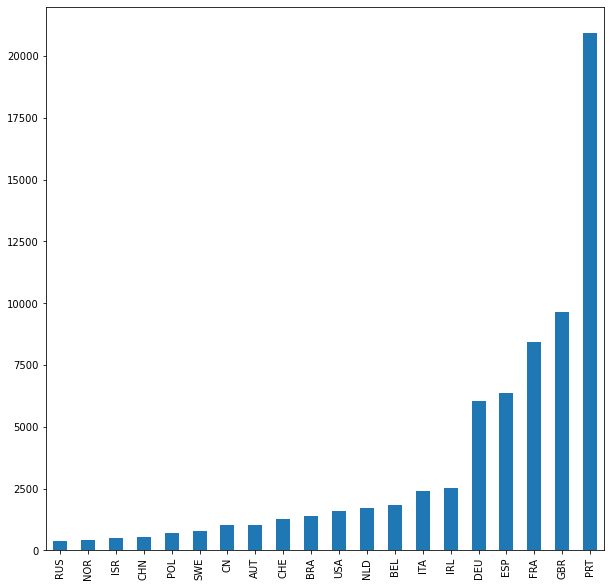

In [17]:
most_popular_country = first_clean_on_new_df
most_popular_country['country'].value_counts()[:20].sort_values(ascending=True).plot(kind='bar', figsize=(10,10))

In [55]:
unique_country = pd.DataFrame(most_popular_country,columns=['country'])
unique_country.country.value_counts().reset_index()

,index,country
0,PRT,20946
1,GBR,9656
2,FRA,8448
3,ESP,6373
4,DEU,6056
5,IRL,2540
6,ITA,2424
7,BEL,1855
8,NLD,1712
9,USA,1588


0    67465
1     7374
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

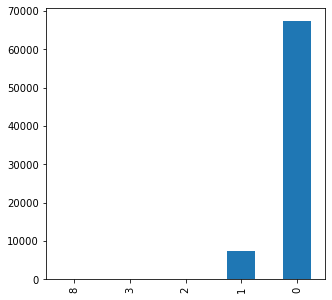

In [56]:
self_driving_tours = first_clean_on_new_df
self_driving_tours['required_car_parking_spaces'].value_counts()[:5].sort_values(ascending=True).plot(kind='bar',figsize=(5,5))
# df.groupby('domain')['ID'].nunique()
self_driving_tours.required_car_parking_spaces.value_counts()

In [57]:
year_to_year = first_clean_on_new_df
year_to_year.arrival_date_year.value_counts()

2016    36202
2017    24854
2015    13816
Name: arrival_date_year, dtype: int64